# Laboratorio 5
- Jimena Hernandez
- Mark Albrand

## Parte 1: Preparación de Datos


### 1.1 Carga de Datos

In [8]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('UK_foods.csv', index_col=0)

### 1.2 Exploración básica de los datos (estadísticas descriptivas).

In [3]:
data.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [4]:
data.isnull().sum()

England      0
Wales        0
Scotland     0
N.Ireland    0
dtype: int64

In [6]:
data.dtypes

England      int64
Wales        int64
Scotland     int64
N.Ireland    int64
dtype: object

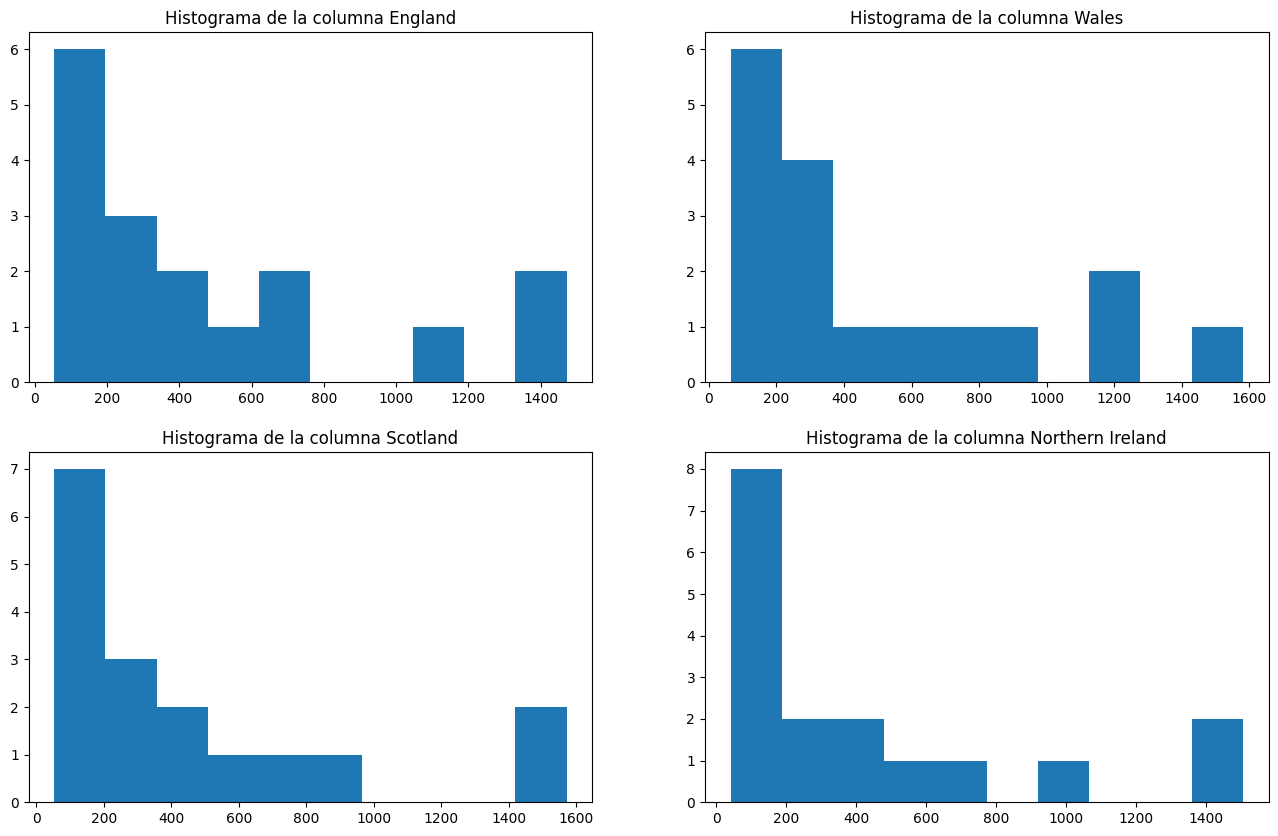

In [17]:
# histograma de la columna 'England'
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(data['England'])
plt.title('Histograma de la columna England')

plt.subplot(2, 2, 2)
plt.hist(data['Wales'])
plt.title('Histograma de la columna Wales')

plt.subplot(2, 2, 3)
plt.hist(data['Scotland'])
plt.title('Histograma de la columna Scotland')

plt.subplot(2, 2, 4)
plt.hist(data['N.Ireland'])
plt.title('Histograma de la columna Northern Ireland')

plt.show()

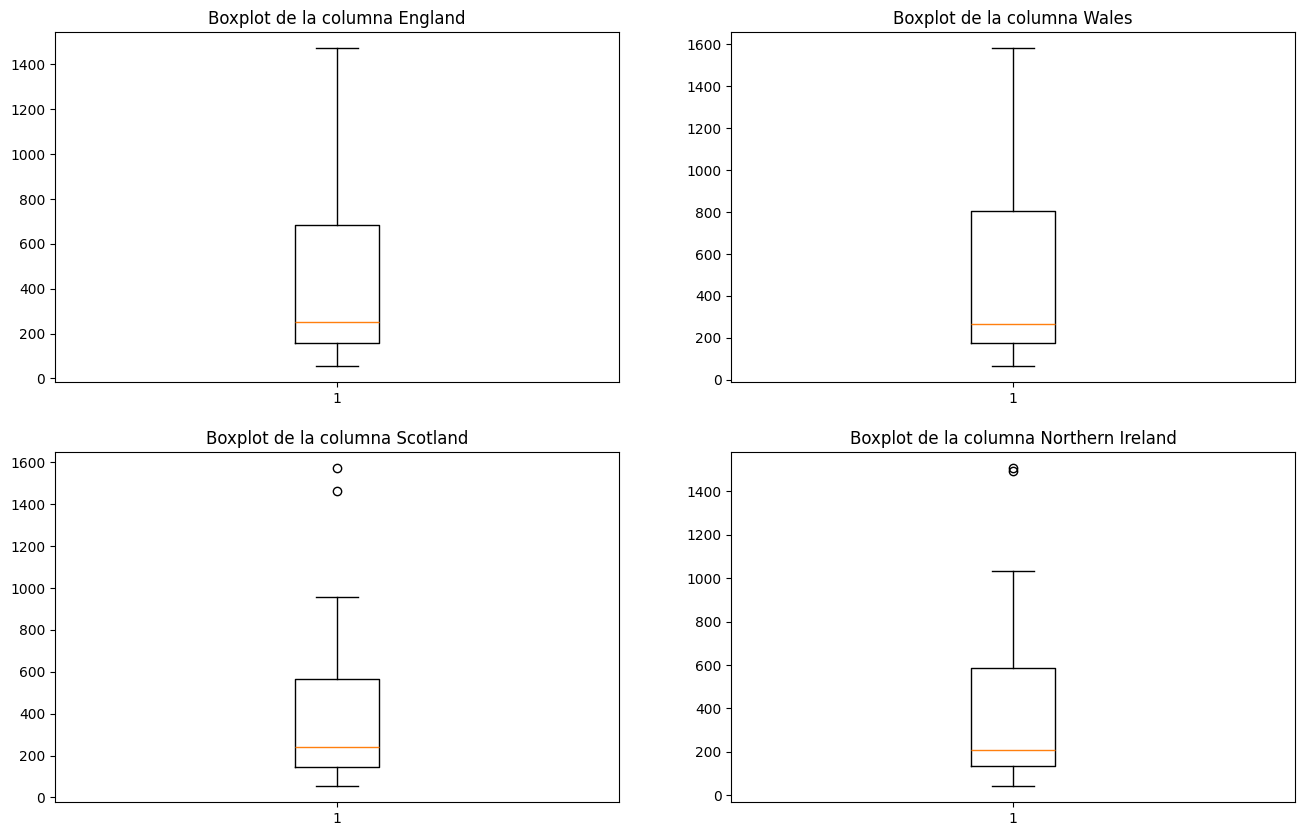

In [18]:
# caja de bigotes
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.boxplot(data['England'])
plt.title('Boxplot de la columna England')

plt.subplot(2, 2, 2)
plt.boxplot(data['Wales'])
plt.title('Boxplot de la columna Wales')

plt.subplot(2, 2, 3)
plt.boxplot(data['Scotland'])
plt.title('Boxplot de la columna Scotland')

plt.subplot(2, 2, 4)
plt.boxplot(data['N.Ireland'])
plt.title('Boxplot de la columna Northern Ireland')

plt.show()

### 1.3 Normalización de los datos

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [22]:
print(data_scaled)

[[-0.83028135 -0.89096138 -0.78414166 -0.78171514]
 [-0.51150903 -0.6154117  -0.47903269 -0.34998399]
 [ 0.49034683  0.66456098  0.63604179  0.33520127]
 [-0.73464965 -0.76429741 -0.74243611 -0.7237214 ]
 [-0.62991018 -0.5976343  -0.60634435 -0.47456313]
 [-0.71415715 -0.73096479 -0.6875604  -0.62491726]
 [ 0.57003991  0.82233539  0.23215655  1.2953198 ]
 [-0.49329347 -0.53096906 -0.63487972 -0.61632559]
 [ 0.04178864  0.14679425 -0.09270767 -0.16096736]
 [-0.61852545 -0.6687439  -0.52732332 -0.52181728]
 [-0.24966034 -0.30875158 -0.27050498 -0.2060736 ]
 [ 1.43983296  1.40676736  1.09041269  0.52421789]
 [ 2.28230266  2.39563515  2.19890209  2.28550915]
 [-0.93957472 -0.95762662 -0.89389308 -0.82252554]
 [ 2.05916204  1.67120616  2.44035523  2.31128414]
 [-0.21550616 -0.06431235 -0.00490653 -0.63350892]
 [-0.94640555 -0.97762619 -0.87413783 -0.83541304]]


## Parte 2: Construcción del Autocodificador 

### 2.1 Uso de todas las observaciones
Como se nos pide que usemos todas las observaciones, no separamos en entrenamiento y prueba.

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,Reshape, Input
from tensorflow.keras.optimizers.legacy import SGD

### 2.2 Arquitectura del autocodificador. 

In [ ]:
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))


encoded = Dense(8, activation='relu')(input_layer)
bottleneck = Dense(2, activation='relu')(encoded) #Dimension de 2 en el cuello de botella

decoded = Dense(8, activation='relu')(bottleneck)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, bottleneck)

In [ ]:

encoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = encoder.fit(data_scaled, data_scaled, epochs=100, batch_size=16)

In [ ]:
metricas =autoencoder.history.history
metricas